In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('C:\\Users\\savit\\AppData\\Local\\Temp\\Temp1_neo_v2.csv.zip\\neo_v2.csv')

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.shape

(90836, 10)

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.19827,2.67941,13569.24922,54839744.08285,Earth,False,16.73000,False
1,2277475,277475 (2005 WK4),0.26580,0.59435,73588.72666,61438126.52395,Earth,False,20.00000,True
2,2512244,512244 (2015 YE18),0.72203,1.61451,114258.69213,49798724.94046,Earth,False,17.83000,False
3,3596030,(2012 BV13),0.09651,0.21579,24764.30314,25434972.72076,Earth,False,22.20000,False
4,3667127,(2014 GE35),0.25501,0.57022,42737.73376,46275567.00130,Earth,False,20.09000,True


In [9]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.00000,-0.14832,-0.14832,-0.05918,-0.05651,NaN,0.27726,-0.12344
est_diameter_min,-0.14832,1.00000,1.00000,0.22155,0.14224,NaN,-0.56019,0.18336
est_diameter_max,-0.14832,1.00000,1.00000,0.22155,0.14224,NaN,-0.56019,0.18336
relative_velocity,-0.05918,0.22155,0.22155,1.00000,0.32717,NaN,-0.35386,0.19118
miss_distance,-0.05651,0.14224,0.14224,0.32717,1.00000,NaN,-0.26417,0.04230
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.27726,-0.56019,-0.56019,-0.35386,-0.26417,NaN,1.00000,-0.36527
hazardous,-0.12344,0.18336,0.18336,0.19118,0.04230,NaN,-0.36527,1.00000


In [11]:
df = df.drop(['orbiting_body','sentry_object'], axis=1)
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.19827,2.67941,13569.24922,54839744.08285,16.73000,False
1,2277475,277475 (2005 WK4),0.26580,0.59435,73588.72666,61438126.52395,20.00000,True
2,2512244,512244 (2015 YE18),0.72203,1.61451,114258.69213,49798724.94046,17.83000,False
3,3596030,(2012 BV13),0.09651,0.21579,24764.30314,25434972.72076,22.20000,False
4,3667127,(2014 GE35),0.25501,0.57022,42737.73376,46275567.00130,20.09000,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.02658,0.05943,52078.88669,12300389.18056,25.00000,False
90832,3837603,(2019 AD3),0.01677,0.03750,46114.60507,54321206.41995,26.00000,False
90833,54017201,(2020 JP3),0.03196,0.07146,7566.80773,28400768.16102,24.60000,False
90834,54115824,(2021 CN5),0.00732,0.01637,69199.15448,68692060.53456,27.80000,False


In [12]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,1.00000,-0.14832,-0.14832,-0.05918,-0.05651,0.27726,-0.12344
est_diameter_min,-0.14832,1.00000,1.00000,0.22155,0.14224,-0.56019,0.18336
est_diameter_max,-0.14832,1.00000,1.00000,0.22155,0.14224,-0.56019,0.18336
relative_velocity,-0.05918,0.22155,0.22155,1.00000,0.32717,-0.35386,0.19118
miss_distance,-0.05651,0.14224,0.14224,0.32717,1.00000,-0.26417,0.04230
absolute_magnitude,0.27726,-0.56019,-0.56019,-0.35386,-0.26417,1.00000,-0.36527
hazardous,-0.12344,0.18336,0.18336,0.19118,0.04230,-0.36527,1.00000


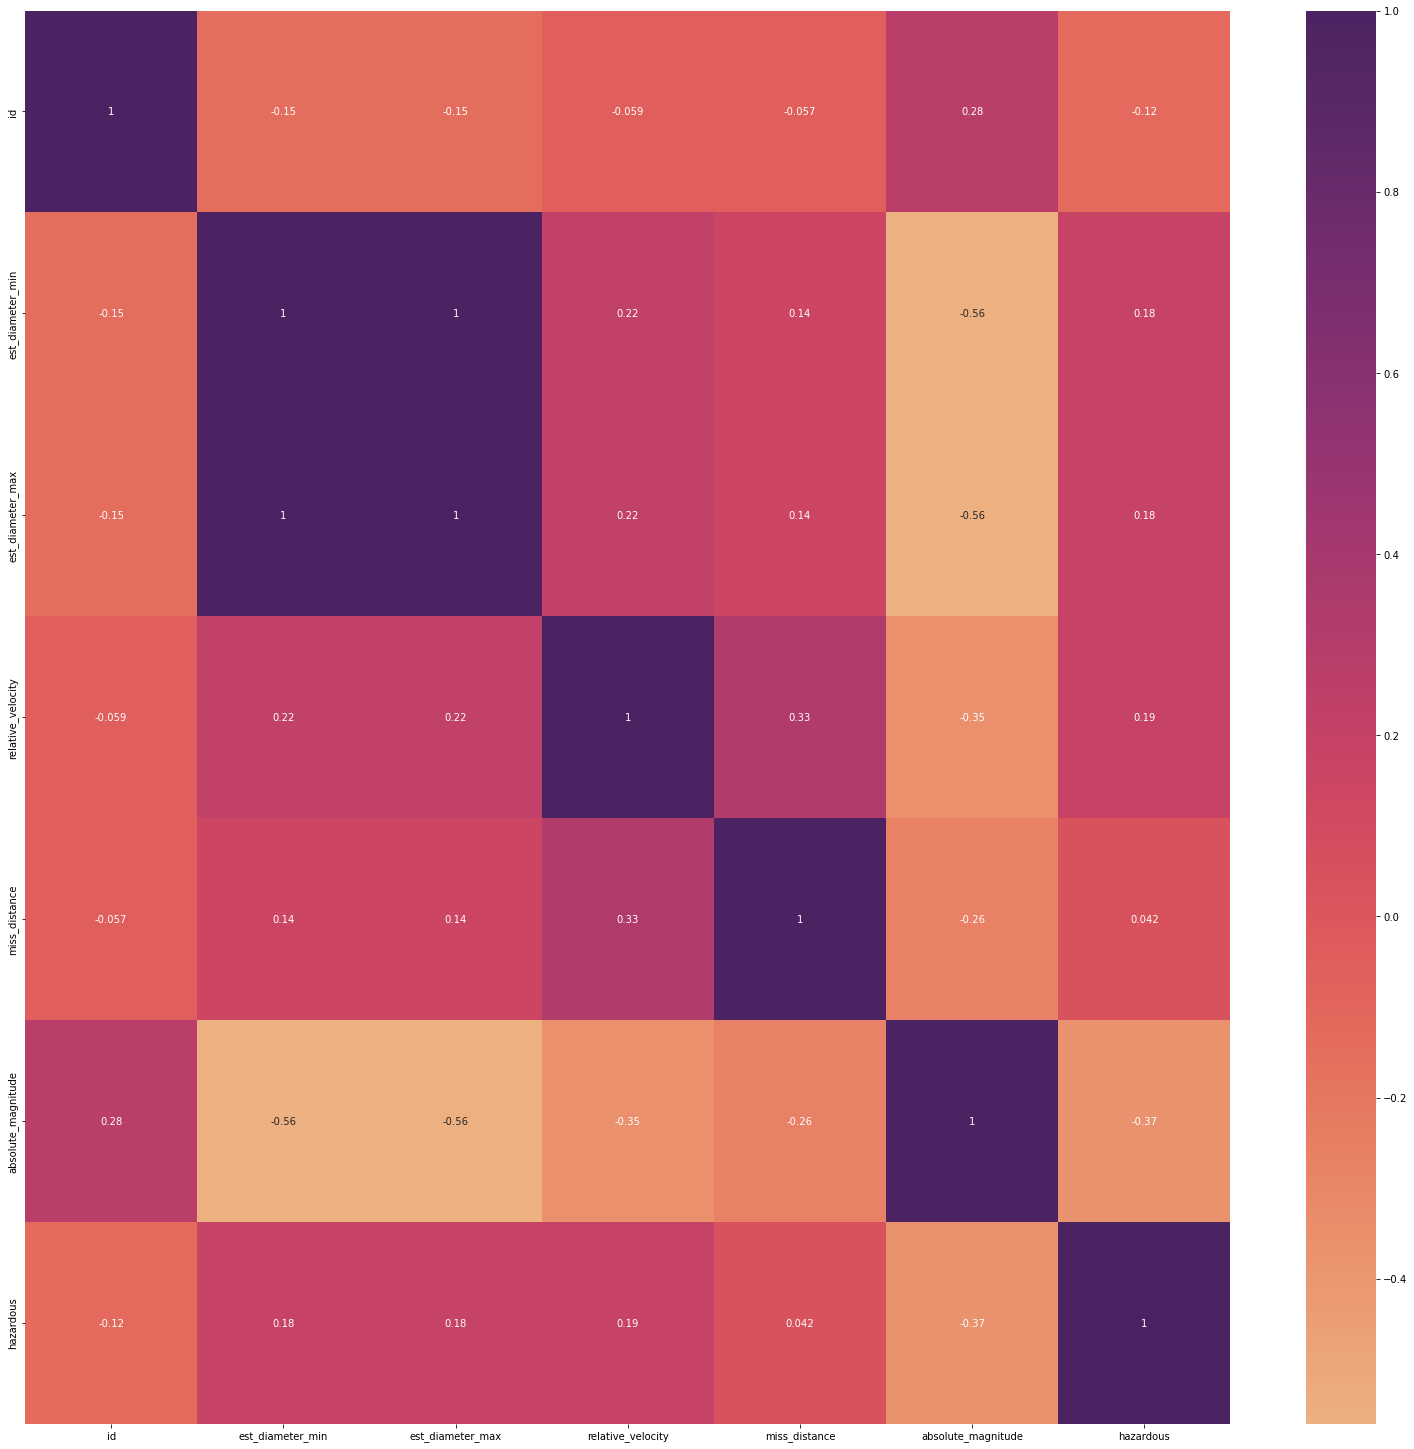

In [13]:
cor = df.corr()
plt.figure(figsize = (27,26))

sns.heatmap(cor, 
            annot = True,
            cmap = 'flare')
plt.show()

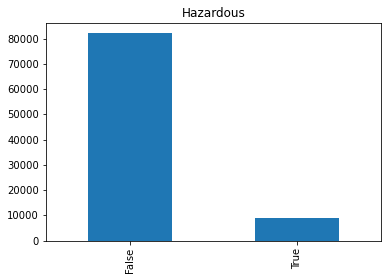

In [14]:
# plot distribution of Hazardous
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

In [15]:
# Separate Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.00000,90836.00000,90836.00000,90836.00000,90836.00000
mean,0.12743,0.28495,48066.91892,37066546.03042,23.52710
std,0.29851,0.66749,25293.29696,22352040.59919,2.89409
min,0.00061,0.00136,203.34643,6745.53252,9.23000
25%,0.01926,0.04306,28619.02064,17210820.23576,21.34000
50%,0.04837,0.10815,44190.11789,37846579.26343,23.70000
75%,0.14340,0.32066,62923.60463,56548996.45140,25.70000
max,37.89265,84.73054,236990.12809,74798651.45220,33.20000


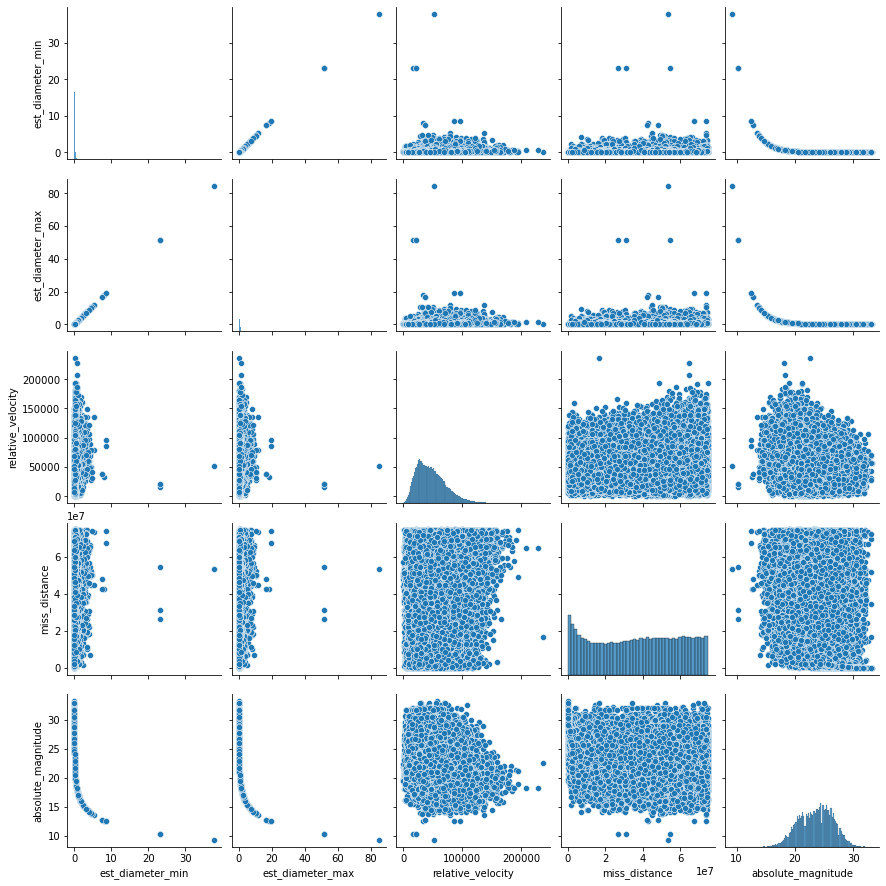

In [16]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(df[numeric_df])

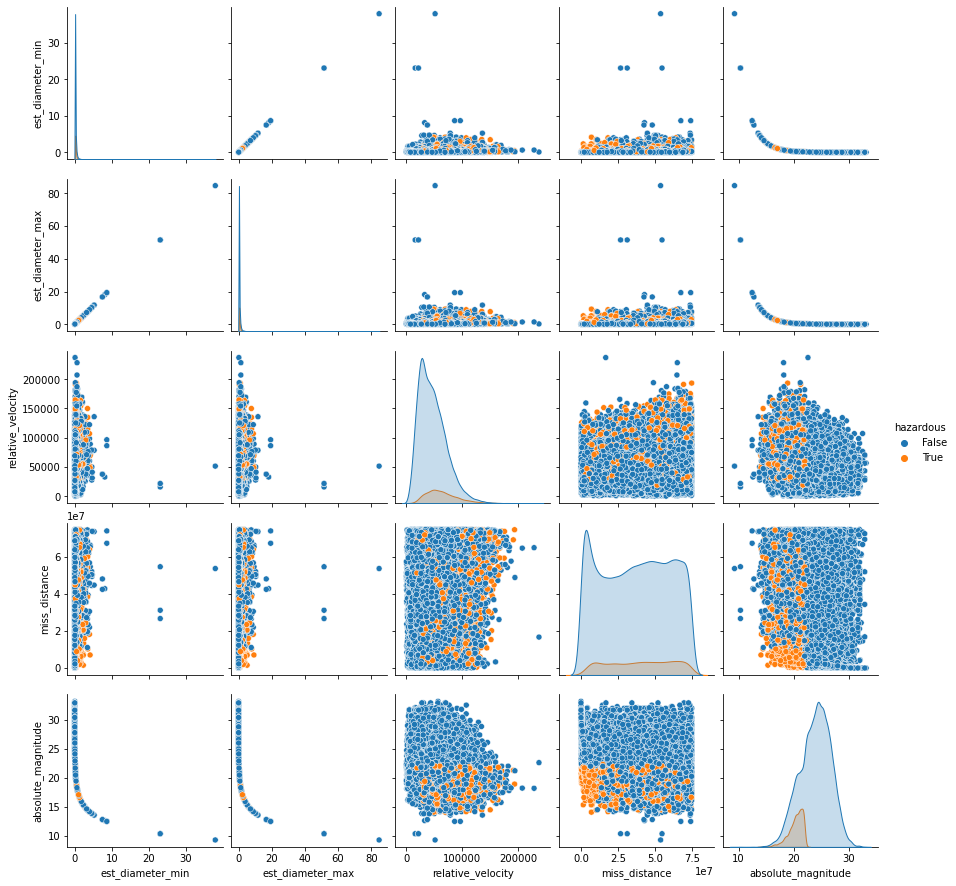

In [17]:
# create pairplot To plot multiple pairwise bivariate distributions with hazardous
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

In [18]:
# Split into x and y ,Irrelevant features dropped
x = df.drop(["id","name","est_diameter_max","hazardous","miss_distance","absolute_magnitude"] , axis = 1)

In [19]:
# Hazardous Transformed into int
y = df.hazardous.astype("int")
print(x.shape, y.shape)

(90836, 2) (90836,)


In [20]:
print(y)

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 90836, dtype: int32


In [21]:
# Train & Test Splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
X_train

,est_diameter_min,relative_velocity
40643,0.21113,23039.53552
46477,0.23150,104496.22904
17854,0.23799,63252.88308
17303,0.46191,70130.22832
1884,0.01326,47996.90528
...,...,...
21243,0.20163,17549.71637
45891,0.01395,13242.89582
42613,0.02315,54783.89952
43567,0.08064,49596.06327


In [22]:
y_train

40643    0
46477    0
17854    0
17303    1
1884     0
        ..
21243    0
45891    0
42613    0
43567    0
68268    0
Name: hazardous, Length: 72668, dtype: int32

In [25]:
# KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
Acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 1)
print(Acc_KNN)

87.5


In [26]:
# Gaussian Naive Bayes Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
Acc_GNB = round(accuracy_score(GNB_pred,y_test) * 100, 2)
print(Acc_GNB)

89.59


In [27]:
# DecisionTree Model

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
Acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(Acc_DTC)

88.93


In [28]:
# Print all models

models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [Acc_GNB, 
              Acc_KNN, Acc_DTC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Gaussian Naive Bayes,89.59000
2,DecisionTreeClassifier,88.93000
1,KNeighborsClassifier,87.50000
